### 데이터 수집

- 서울 열린 데이터 광장 홈페이지(https://data.seoul.go.kr/)
    - 서울시 주민등록인구(구별) 통계
    - 서울시 자치구 년도별 CCTV 설치 현황
    - 서울시 5대 범죄 발생현황 통계

In [33]:
import seaborn as sns
sns.set(font_scale=1)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 1.CCTV 설치 현황

In [35]:
cctv_df = pd.read_csv('../../data/dataset/서울시CCTV설치운영현황(자치구)_년도별_211231기준.csv',encoding='cp949'
                      ,skiprows=[0,2],thousands=',')
cctv_df.head(3)

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,NaN,NaN,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228


In [36]:
cctv_df.shape

(25, 13)

In [37]:
cctv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구분        25 non-null     object 
 1   총계        25 non-null     int64  
 2   2012년 이전  25 non-null     int64  
 3   2012년     24 non-null     float64
 4   2013년     24 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
 10  2019년     25 non-null     int64  
 11  2020년     25 non-null     int64  
 12  2021년     25 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 2.7+ KB


In [38]:
cctv_df.isnull().sum()

구분          0
총계          0
2012년 이전    0
2012년       1
2013년       1
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
2019년       0
2020년       0
2021년       0
dtype: int64

### 데이터 전처리

#### 1) NaN 처리 - 0으로 채우기

In [39]:
cctv_df.fillna(0,inplace=True)

In [40]:
cctv_df.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655


#### 2) 컬럼명 변경

- 구분 -> 구 별, 총계 -> cctv 총계

In [41]:
cctv_df.columns

Index(['구분', '총계', '2012년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년'],
      dtype='object')

In [42]:
cctv_df.rename(columns={'구분':'구 별','총계':'cctv 총계'},inplace=True)
cctv_df.head()

,구 별,cctv 총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655


#### 3) 2019년 이전 컬럼 생성

- 2012년 이전 ~ 2019년 데이터 합 

In [43]:
cctv_df['2019년 이전'] = cctv_df['2012년 이전'] + cctv_df['2012년'] + cctv_df['2013년'] \
                        + cctv_df['2014년'] + cctv_df['2015년'] + cctv_df['2016년']     \
                        + cctv_df['2017년'] + cctv_df['2018년'] + cctv_df['2019년']

In [44]:
cctv_df.head()

,구 별,cctv 총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2019년 이전
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0,1515.0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403,1683.0
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228,1766.0
3,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283,3074.0
4,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655,2381.0


In [45]:
cctv_df.drop(columns=['2019년 이전'],inplace=True)
cctv_df.head()

,구 별,cctv 총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655


In [46]:
cctv_df.head()

,구 별,cctv 총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655


In [47]:
cctv_df[['2012년', '2012년 이전', '2013년', '2014년', '2015년', '2016년', '2017년','2018년', '2019년']]

cctv_dfr[cctv_df.columns.difference(['구 별','cctv 총계','2020년','2021년'])]

NameError: name 'cctv_dfr' is not defined

In [48]:
cctv_df.columns.difference(['구 별','cctv 총계','2020년','2021년'])

Index(['2012년', '2012년 이전', '2013년', '2014년', '2015년', '2016년', '2017년',
       '2018년', '2019년'],
      dtype='object')

In [49]:
cctv_df['2019년 이전'] = cctv_df[cctv_df.columns.difference(['구 별','cctv 총계','2020년','2021년'])].sum(axis=1)
cctv_df['2019년 이전']

0     1515.0
1     1683.0
2     1766.0
3     3074.0
4     2381.0
5     2186.0
6     2355.0
7     3945.0
8     1964.0
9     1153.0
10    1884.0
11    3372.0
12    2542.0
13    2089.0
14    2933.0
15    2071.0
16    3660.0
17    1850.0
18    2560.0
19    1867.0
20    4582.0
21    3093.0
22    5429.0
23    2519.0
24    1933.0
Name: 2019년 이전, dtype: float64

In [50]:
cctv_df.head(3)

,구 별,cctv 총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2019년 이전
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0,1515.0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403,1683.0
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228,1766.0


#### 4) 2019년 이전 컬럼 삭제

In [51]:
cctv_df.drop(columns=['2012년 이전','2012년','2013년','2014년','2015년','2016년','2017년','2018년','2019년'],inplace=True)

In [52]:
# 위아래 둘중에 하나만 실행
# cctv_df.drop(cctv_df[cctv_df.columns.difference(['구 별','cctv 총계','2020년','2021년'])],inplace=True)

In [53]:
cctv_df.head(3)

,구 별,cctv 총계,2020년,2021년,2019년 이전
0,종로구,1715,200,0,1515.0
1,중 구,2447,361,403,1683.0
2,용산구,2611,617,228,1766.0


### EDA

#### 1. 구별 cctv가 가장 적게 설치되어 있는 구 알아보기

In [54]:
cctv_df[cctv_df['cctv 총계'] == cctv_df['cctv 총계'].min()]
# cctv_df[min(cctv_df['cctv 총계']) == cctv_df['cctv 총계']]

,구 별,cctv 총계,2020년,2021년,2019년 이전
0,종로구,1715,200,0,1515.0


In [55]:
print(cctv_df.sort_values('cctv 총계').head(1)) # 최소
print(cctv_df.sort_values('cctv 총계').tail(1)) # 최대

   구 별  cctv 총계  2020년  2021년  2019년 이전
0  종로구     1715    200      0    1515.0
    구 별  cctv 총계  2020년  2021년  2019년 이전
22  강남구     6871    926    516    5429.0


#### 2 구별 cctv가 가장 많이 설치되어 있는 구 알아보기

In [56]:
cctv_df[cctv_df['cctv 총계'] == cctv_df['cctv 총계'].max()]
# cctv_df.sort_values('cctv 총계', ascending=False).head(1)

,구 별,cctv 총계,2020년,2021년,2019년 이전
22,강남구,6871,926,516,5429.0


### 2. 서울시 거주 인구 데이터

In [57]:
# usecols : 사용할 열만
seoul_df = pd.read_excel('../../data/dataset/서울시구별인구통계.xls',skiprows=[0,1,3], usecols='B,D,G,J,N') 

seoul_df.head(3)

,자치구,계,계.1,계.2,65세이상고령자
0,종로구,153684,144275,9409,28064
1,중구,131450,122173,9277,24742
2,용산구,236518,222169,14349,39461


#### 1) 컬럼명 변경
- '구 별', '총인구', '한국인','외국인', '고령자'

In [58]:
seoul_df.rename(columns={'자치구':'구 별','계':'총인구','계.1':'한국인','계.2':'외국인','65세이상고령자':'고령자'}, inplace=True)
seoul_df
# seoul_df.columns['구 별', '총인구', '한국인','외국인', '고령자']  : 전부를 한번에 바꿀 때 사용

,구 별,총인구,한국인,외국인,고령자
0,종로구,153684,144275,9409,28064
1,중구,131450,122173,9277,24742
2,용산구,236518,222169,14349,39461
3,성동구,291609,285073,6536,46896
4,광진구,353110,340707,12403,52604
5,동대문구,352592,337982,14610,62963
6,중랑구,393600,389043,4557,72851
7,성북구,442680,433150,9530,75719
8,강북구,300824,297384,3440,64961
9,도봉구,318100,316098,2002,65122


In [59]:
seoul_df.head(3)

,구 별,총인구,한국인,외국인,고령자
0,종로구,153684,144275,9409,28064
1,중구,131450,122173,9277,24742
2,용산구,236518,222169,14349,39461


In [60]:
seoul_df.index

RangeIndex(start=0, stop=25, step=1)

### EDA

#### 1) 어느 구에 외국인이 가장 많은가?

In [61]:
seoul_df.sort_values('외국인',ascending=False).head(1)
# seoul_df[max(seoul_df['외국인']) == seoul_df['외국인']]
# seoul_df[seoul_df['외국인'] == seoul_df['외국인'].max()]

# 최소 : max -> min
# ascending = True(기본 설정)

,구 별,총인구,한국인,외국인,고령자
16,구로구,419984,396017,23967,73864


#### 2) 어느 구에 고령자 수가 가장 많은가?

In [62]:
seoul_df.sort_values('고령자',ascending=False).head(5)
# seoul_df[max(seoul_df['고령자']) == seoul_df['고령자']]
# seoul_df[seoul_df['고령자'] == seoul_df['고령자'].max()]

# 최소 : max -> min
# ascending = True(기본 설정)

,구 별,총인구,한국인,외국인,고령자
23,송파구,668261,662607,5654,99854
15,강서구,578426,573046,5380,93924
10,노원구,514445,510486,3959,89426
11,은평구,476013,472259,3754,88418
20,관악구,500336,486375,13961,80686


#### 3) cctv 설치 대수 대비 범죄율 파악 
- 서울시 구별 인구 + cctv merge

In [63]:
cctv_df.iloc[1,0] = '중구' # 중 구 -> 중구 

In [64]:
# seoul_df = seoul_df.merge(cctv_df)
# seoul_df
merge_df = pd.merge(seoul_df,cctv_df, on='구 별')
merge_df

,구 별,총인구,한국인,외국인,고령자,cctv 총계,2020년,2021년,2019년 이전
0,종로구,153684,144275,9409,28064,1715,200,0,1515.0
1,중구,131450,122173,9277,24742,2447,361,403,1683.0
2,용산구,236518,222169,14349,39461,2611,617,228,1766.0
3,성동구,291609,285073,6536,46896,3829,472,283,3074.0
4,광진구,353110,340707,12403,52604,3211,175,655,2381.0
5,동대문구,352592,337982,14610,62963,2628,223,219,2186.0
6,중랑구,393600,389043,4557,72851,3737,934,448,2355.0
7,성북구,442680,433150,9530,75719,4602,253,404,3945.0
8,강북구,300824,297384,3440,64961,3090,656,470,1964.0
9,도봉구,318100,316098,2002,65122,1930,184,593,1153.0


In [65]:
merge_df.head(2)

,구 별,총인구,한국인,외국인,고령자,cctv 총계,2020년,2021년,2019년 이전
0,종로구,153684,144275,9409,28064,1715,200,0,1515.0
1,중구,131450,122173,9277,24742,2447,361,403,1683.0


#### 구 별 컬럼을 인덱스로 설정

In [66]:
merge_df.set_index('구 별',inplace=True)
merge_df

,총인구,한국인,외국인,고령자,cctv 총계,2020년,2021년,2019년 이전
구 별,,,,,,,,
종로구,153684,144275,9409,28064,1715,200,0,1515.0
중구,131450,122173,9277,24742,2447,361,403,1683.0
용산구,236518,222169,14349,39461,2611,617,228,1766.0
성동구,291609,285073,6536,46896,3829,472,283,3074.0
광진구,353110,340707,12403,52604,3211,175,655,2381.0
동대문구,352592,337982,14610,62963,2628,223,219,2186.0
중랑구,393600,389043,4557,72851,3737,934,448,2355.0
성북구,442680,433150,9530,75719,4602,253,404,3945.0
강북구,300824,297384,3440,64961,3090,656,470,1964.0


#### 1인당 cctv 비율 컬럼을 생성
- cctv 총계 / 총인구

In [67]:
merge_df['1인당 cctv 비율'] = round(merge_df['cctv 총계'] / merge_df['총인구'] * 100 ,4)
merge_df.head(3)

,총인구,한국인,외국인,고령자,cctv 총계,2020년,2021년,2019년 이전,1인당 cctv 비율
구 별,,,,,,,,,
종로구,153684,144275,9409,28064,1715,200,0,1515.0,1.1159
중구,131450,122173,9277,24742,2447,361,403,1683.0,1.8615
용산구,236518,222169,14349,39461,2611,617,228,1766.0,1.1039


#### 상관계수
- 변수간의 관계의 정도와 방향을 수치로 요약해 주는 지표
- 상관계수 -1 ~ 1 사이의 값으로 나타남
- 0에 가까울수록 상관 관계는 낮아지며, -1 이나 +1 에 가까울수록 상관관계는 높아짐
- 증감의 방향이 +인 경우에는 정적인 상관관계, -인 경우에는 부정적인 상관관계가 있따고 봄

** 총인구와 cctv 총대수 상관관계 **

In [68]:
merge_df['총인구'].corr(merge_df['cctv 총계'],method='spearman')

0.48461538461538467

** 외국인과 cctv 총대수 상관관계 **

In [69]:
merge_df['외국인'].corr(merge_df['cctv 총계'],method='spearman')

0.05615384615384616

### 시각화 - 1인당 cctv 비율 bar차트

<BarContainer object of 25 artists>

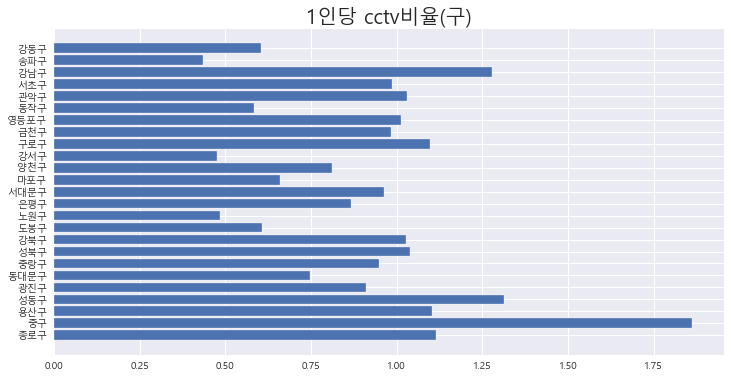

In [70]:
# plt.figure(figsize=(20,5))
plt.figure(figsize=(12,6))
plt.title('1인당 cctv비율(구)',fontsize=20)
# plt.bar(merge_df.index,merge_df['1인당 cctv 비율'])
plt.barh(merge_df.index,merge_df['1인당 cctv 비율'])

<AxesSubplot:ylabel='구 별'>

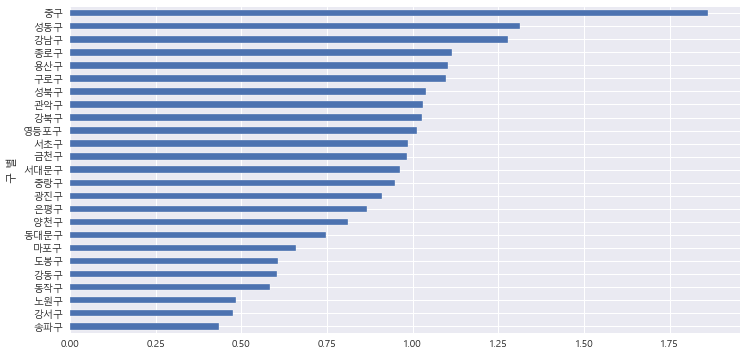

In [71]:
merge_df['1인당 cctv 비율'].sort_values().plot.barh(figsize=(12,6))

<AxesSubplot:xlabel='1인당 cctv 비율', ylabel='구 별'>

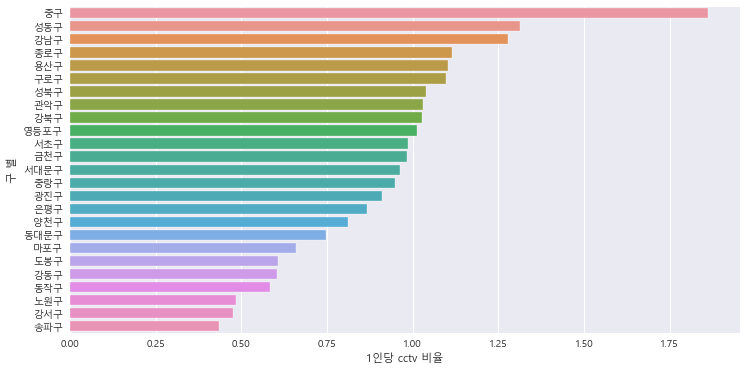

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(data=merge_df, x='1인당 cctv 비율', y=merge_df.index, order=merge_df['1인당 cctv 비율'].sort_values(ascending=False).index)

### 범죄율 

In [73]:
crime_df = pd.read_excel('../../data/dataset/서울시5대범죄.xls',skiprows=[0,2],usecols='B,C,D')
crime_df.head(3)

,자치구,발생,검거
0,종로구,3102,3343
1,중구,3411,2323
2,용산구,2969,2056


In [74]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     25 non-null     object
 1   발생      25 non-null     int64 
 2   검거      25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


#### 1) 컬럼명 변경
- '구 별','범죄건'검거건'

In [75]:
crime_df.columns = ['구 별','범죄건','검거건']
crime_df.head(1)

,구 별,범죄건,검거건
0,종로구,3102,3343


#### 2) 구 별 인덱스 설정

In [76]:
crime_df.set_index('구 별',inplace=True)
crime_df.head(1)

,범죄건,검거건
구 별,,
종로구,3102,3343


In [77]:
crime_df.head(1)

,범죄건,검거건
구 별,,
종로구,3102,3343


#### 3) 검거율 컬럼 생성
- 검거건 / 범죄건 * 100

In [78]:
crime_df['검거율'] = round(crime_df['검거건'] / crime_df['범죄건'] * 100,2)
crime_df.head(1)

,범죄건,검거건,검거율
구 별,,,
종로구,3102,3343,107.77


#### 4) merge_df 와 crime_df concat

In [79]:
merge_crime_df = pd.concat([merge_df,crime_df],axis=1) # axis=1 옆으로
merge_crime_df.head(1)

,총인구,한국인,외국인,고령자,cctv 총계,2020년,2021년,2019년 이전,1인당 cctv 비율,범죄건,검거건,검거율
구 별,,,,,,,,,,,,
종로구,153684,144275,9409,28064,1715,200,0,1515.0,1.1159,3102,3343,107.77


<AxesSubplot:xlabel='검거건', ylabel='cctv 총계'>

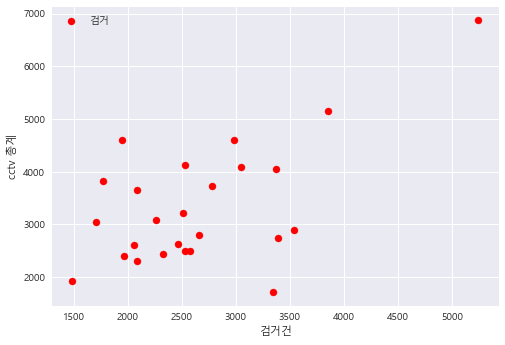

In [80]:
merge_crime_df.plot.scatter(x='검거건',y='cctv 총계',color='red',s=50, label='검거')

Text(0.5, 0, '검거건/범죄건')

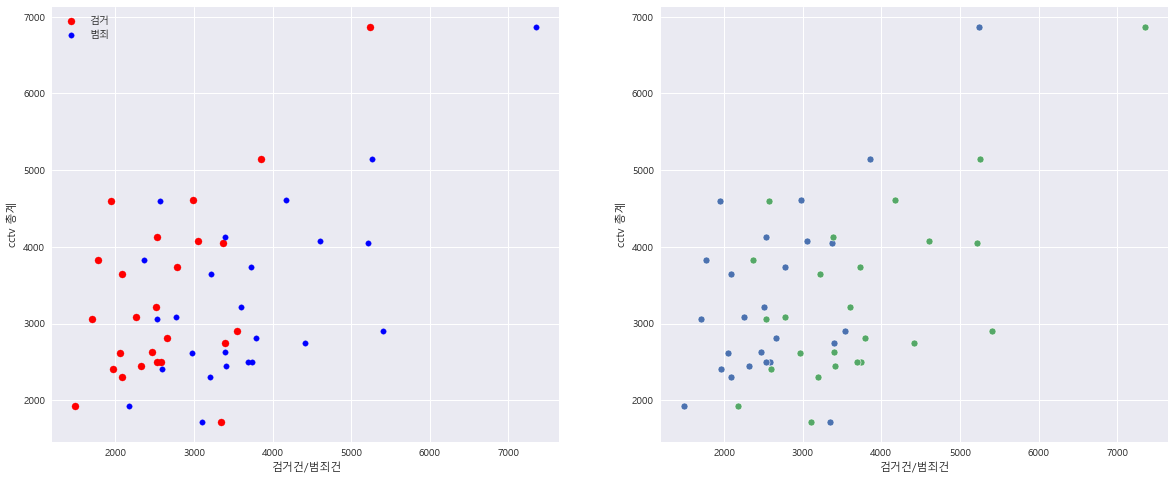

In [82]:
fig, axes = plt.subplots(1,2, figsize=(20,8))

# pandas를 통한 scatter
merge_crime_df.plot.scatter(x='검거건',y='cctv 총계',color='red',s=50, label='검거', ax = axes[0]) # ax = axes[0] 서브플랏? 설정
merge_crime_df.plot.scatter(x='범죄건',y='cctv 총계',color='blue',s=30, label='범죄', ax = axes[0])
axes[0].set_xlabel('검거건/범죄건')

# seaborn을 통한 scatter
sns.scatterplot(data=merge_crime_df, x='검거건', y='cctv 총계', ax=axes[1])
sns.scatterplot(data=merge_crime_df, x='범죄건', y='cctv 총계', ax=axes[1])
axes[1].set_xlabel('검거건/범죄건')


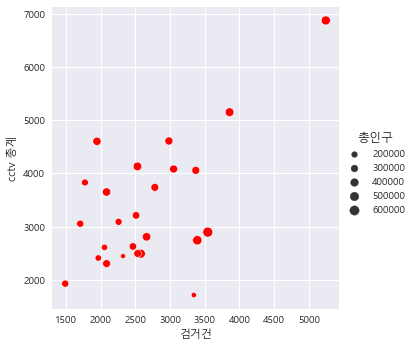

In [84]:
sns.relplot(data=merge_crime_df, x='검거건',y='cctv 총계',size='총인구', color='red')

<AxesSubplot:xlabel='검거건', ylabel='cctv 총계'>

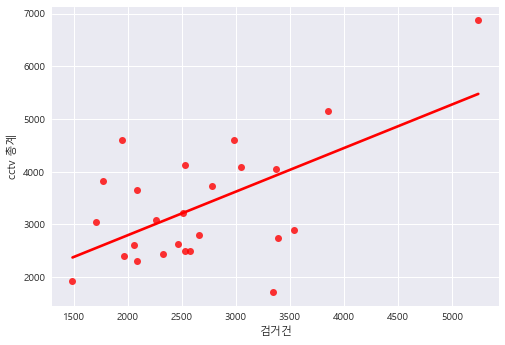

In [87]:
sns.regplot(data=merge_crime_df, x='검거건',y='cctv 총계', color='red',ci=None)

<AxesSubplot:xlabel='범죄건', ylabel='cctv 총계'>

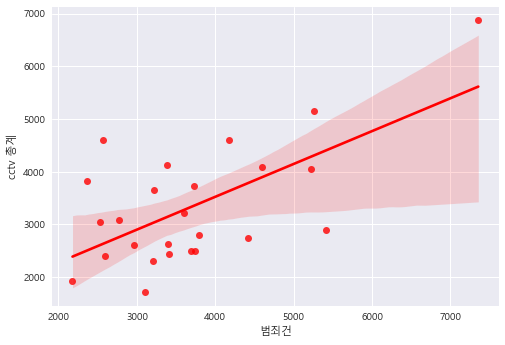

In [88]:
sns.regplot(data=merge_crime_df, x='범죄건',y='cctv 총계', color='red')